In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
varinfo.clear()

dout = 'check_gnn_nobtag/'

In [3]:
varinfo.Y1_m = dict(bins=np.linspace(0,1000,30))
varinfo.Y2_m = dict(bins=np.linspace(0,1000,30))

varinfo.H1Y1_m = dict(bins=np.linspace(0,300,30))
varinfo.H2Y1_m = dict(bins=np.linspace(0,300,30))
varinfo.H1Y2_m = dict(bins=np.linspace(0,300,30))
varinfo.H2Y2_m = dict(bins=np.linspace(0,300,30))


In [4]:
bkgtrees = ObjIter([Tree(filter(os.path.isfile,fc.eightb.preselection_golden_nobtag.Bkg_MC_List))])
# bkgtrees = ObjIter([])

In [5]:
fc.eightb.preselection_golden.signal_list

['/eos/uscms/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/golden_gcn/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_700_MY_300_accstudies.root',
 '/eos/uscms/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/golden_gcn/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_800_MY_300_accstudies.root',
 '/eos/uscms/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/golden_gcn/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_800_MY_350_accstudies.root',
 '/eos/uscms/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/golden_gcn/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_900_MY_300_accstudies.root',
 '/eos/uscms/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/golden_gcn/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_900_MY_400_accstudies.root',
 '/eos/uscms/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/golden_gcn/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1000_MY_300_accstudies.root',
 '/eos/uscms/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/golden_gcn/NMSSM_XYY_YToHH_8b/

In [6]:
signaltrees = ObjIter([ Tree(f) for i,f in enumerate(fc.eightb.preselection_golden_nobtag.signal_list) if i in (0,5,7) ])

In [7]:
minmasstrees = ObjIter([ Tree(f) for i,f in enumerate(fc.eightb.preselection.signal_list) if i in (0,5,7)])
# minmasstrees = ObjIter([])

In [8]:
for signal in signaltrees+minmasstrees: signal.color = None

In [9]:
(bkgtrees+signaltrees+minmasstrees).extend(kwargs=lambda t : build_collection(t,'H\dY\d_b\d','bjet',ptordered=True))

[None, None, None, None, None, None, None]

In [10]:
(bkgtrees+signaltrees+minmasstrees).extend(kwargs=lambda t : build_collection(t,'H\dY\d','higgs',ptordered=True))

[None, None, None, None, None, None, None]

In [11]:
(bkgtrees+signaltrees+minmasstrees).extend(kwargs=lambda t : build_collection(t,'Y\d','y',ptordered=True))

[None, None, None, None, None, None, None]

In [12]:
(signaltrees+minmasstrees).extend(kwargs=lambda t : build_collection(t,'gen_Y\d','gen_y',ptordered=True))

[None, None, None, None, None, None]

In [14]:
def calc_nfound_h(t):
    nfound_h = ak.sum((t.higgs_b1_genHflag != -1) & (t.higgs_b2_genHflag != -1) & (t.higgs_b1_genHflag == t.higgs_b2_genHflag),axis=-1)
    t.extend(nfound_h=nfound_h)
    
(signaltrees+minmasstrees).apply(calc_nfound_h)

[None, None, None, None, None, None]

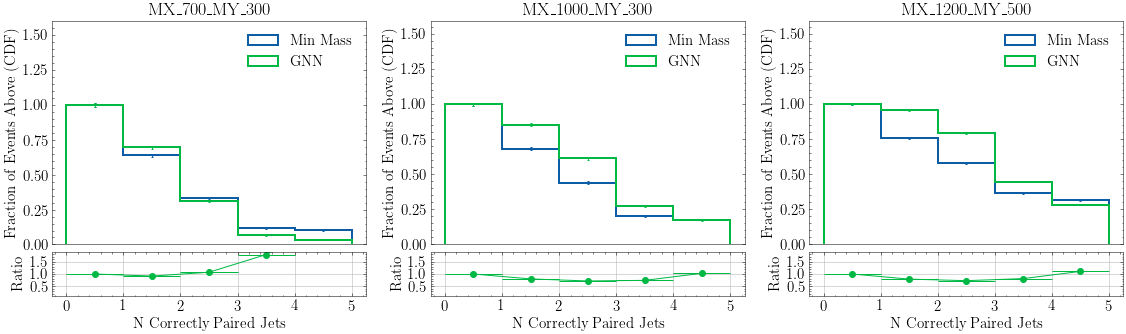

In [15]:

fig,axs = plt.subplots(ncols=3,figsize=(16,5))
for i,(gnn,minmass) in enumerate(zip(signaltrees,minmasstrees)):
    hist_multi(
        [minmass.nfound_h[minmass.nfound_presel == 8],
         gnn.nfound_h[gnn.nfound_presel == 8]],
        h_label=["Min Mass", "GNN"],
        h_label_stat=None,
        cumulative=-1,
        legend=True,
        title=gnn.sample,
        
        ratio=True,
        r_xlabel="N Correctly Paired Jets",
        figax=(fig, axs[i])
    )
fig.tight_layout()

study.save_fig(fig,dout,'pairing-efficiency')

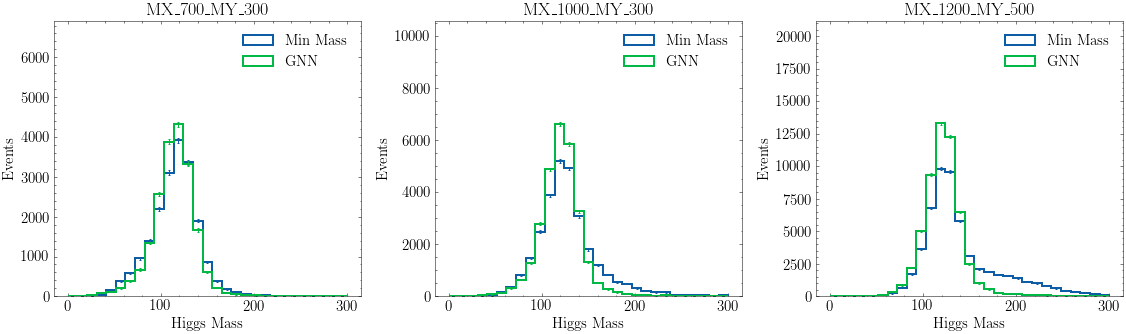

In [16]:

fig,axs = plt.subplots(ncols=3,figsize=(16,5))
for i,(gnn,minmass) in enumerate(zip(signaltrees,minmasstrees)):
    hist_multi(
        [minmass.higgs_m[minmass.nfound_presel == 8],
         gnn.higgs_m[gnn.nfound_presel == 8]],
        h_label=["Min Mass", "GNN"],
        h_label_stat=None,
        bins=np.linspace(0,300,30),
        legend=True,
        title=gnn.sample,
        
        xlabel="Higgs Mass",
        figax=(fig, axs[i])
    )
fig.tight_layout()

study.save_fig(fig,dout,'pairing-mass')

(<Figure size 1512x360 with 8 Axes>,
 array([<AxesSubplot:xlabel='bjet_btag', ylabel='bjet_score'>,
        <AxesSubplot:xlabel='bjet_btag', ylabel='bjet_score'>,
        <AxesSubplot:xlabel='bjet_btag', ylabel='bjet_score'>,
        <AxesSubplot:xlabel='bjet_btag', ylabel='bjet_score'>],
       dtype=object))

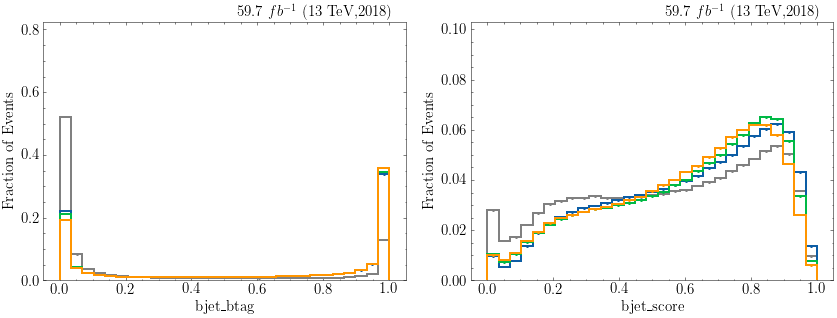

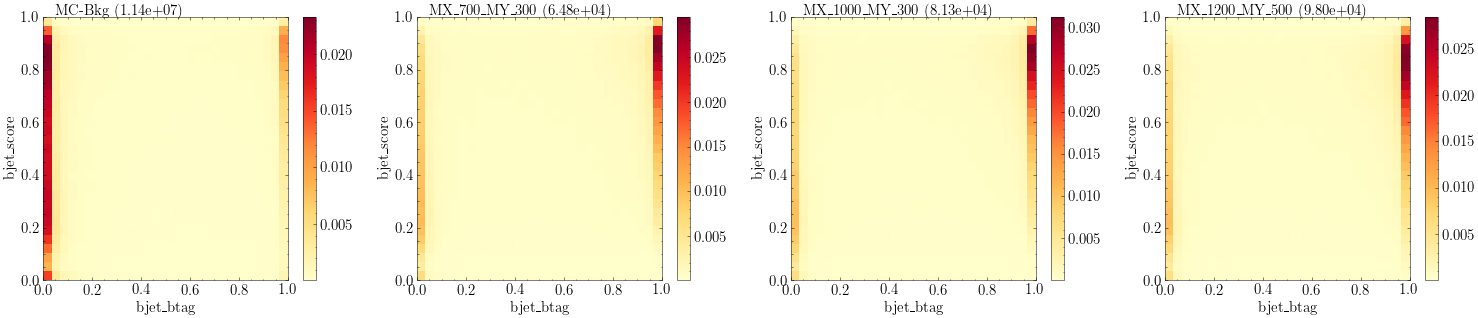

In [13]:
study.quick(
    bkgtrees+signaltrees,
    varlist=['bjet_btag','bjet_score'],
    binlist=[np.linspace(0,1,30)]*2,density=1,
    # log=True,
)

study.quick2d(
    bkgtrees+signaltrees,
    varlist=['bjet_btag','bjet_score'],
    binlist=[np.linspace(0,1,30)]*2,density=1,
    # log=True,
    dim=-1,
)

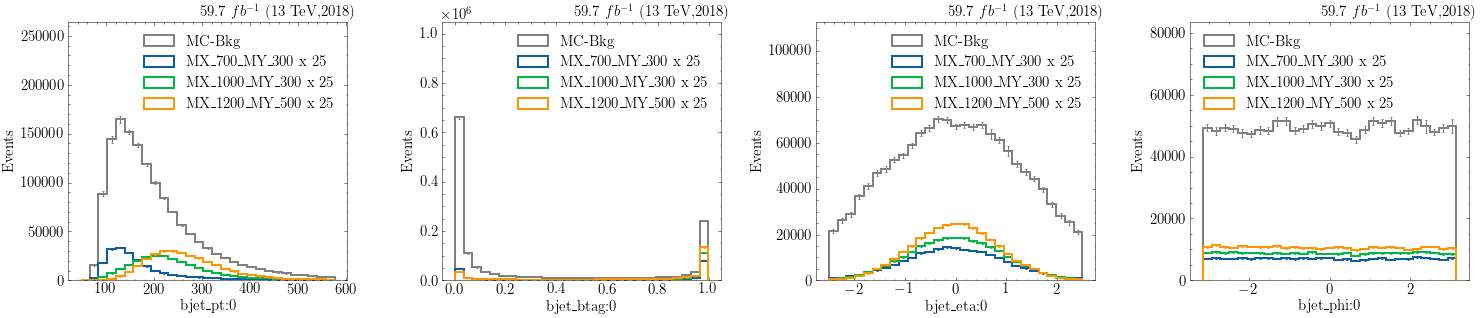

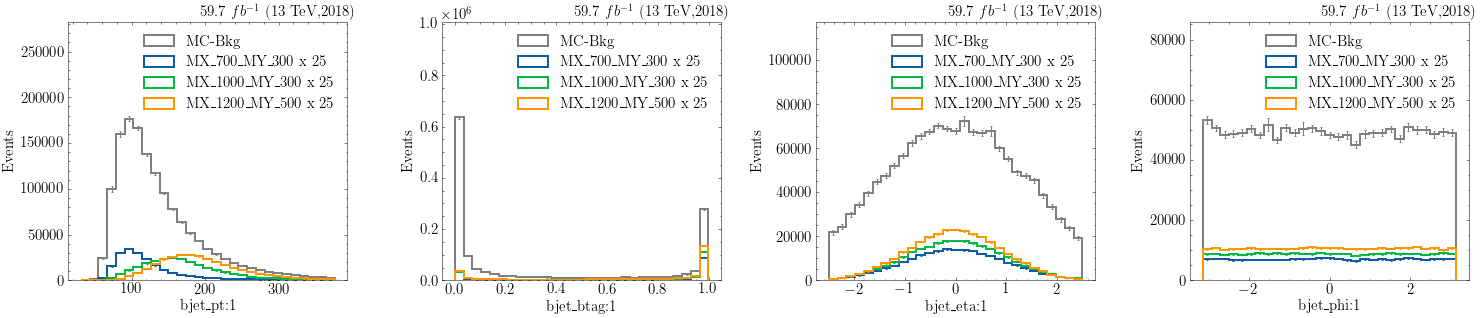

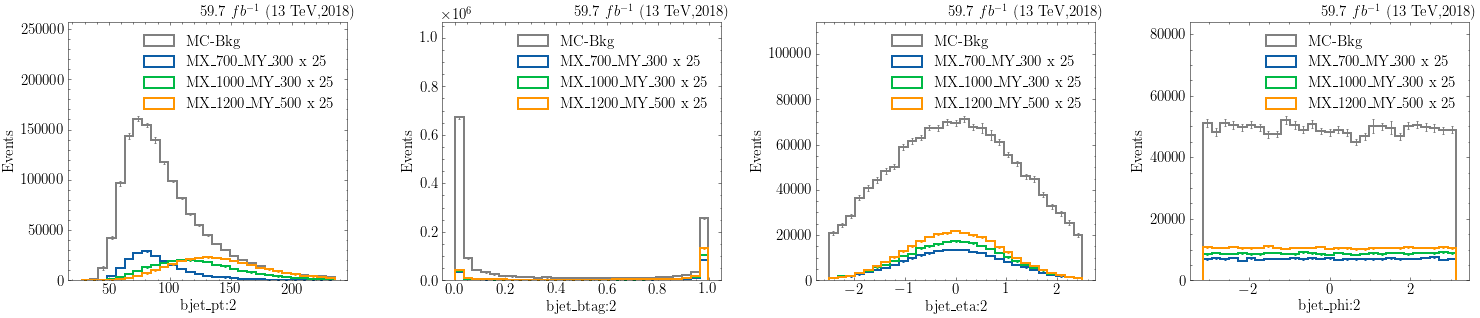

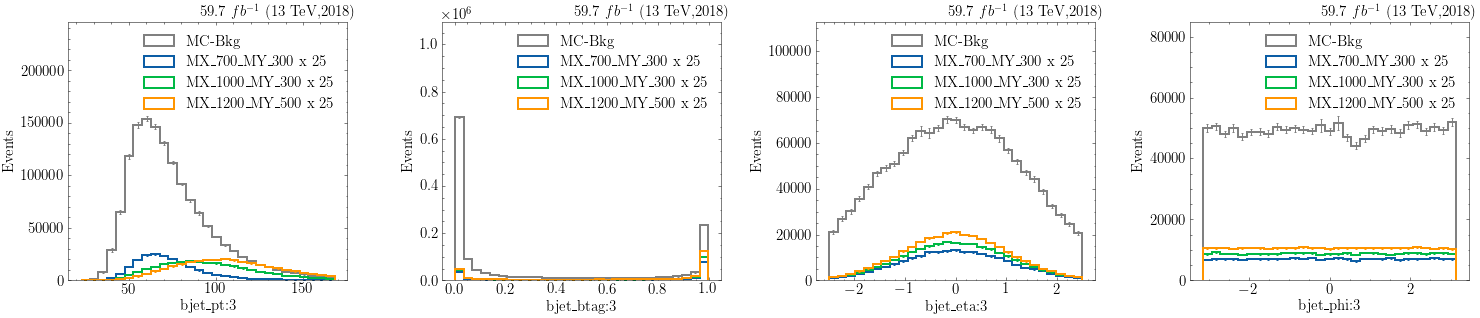

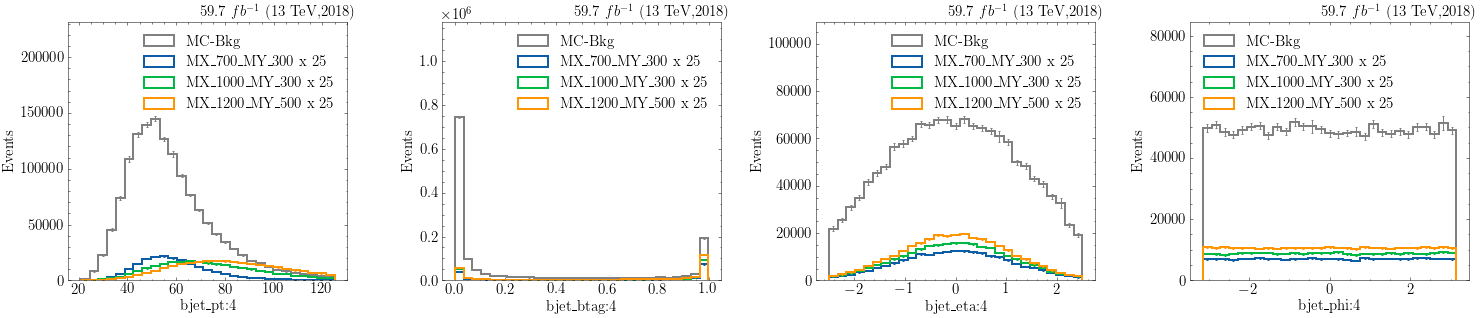

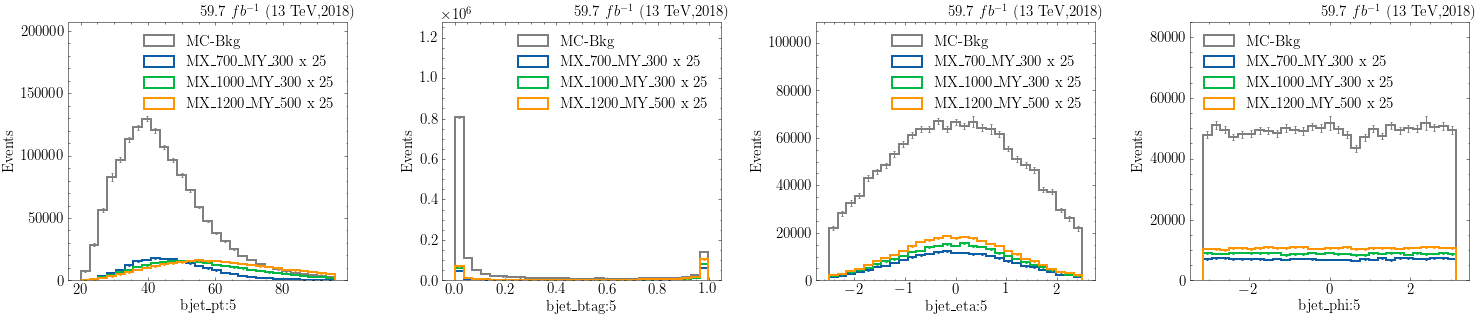

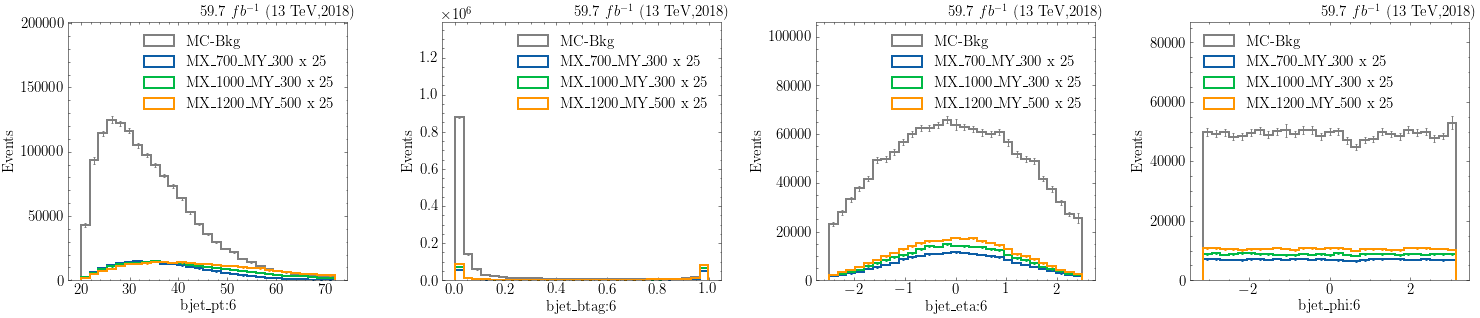

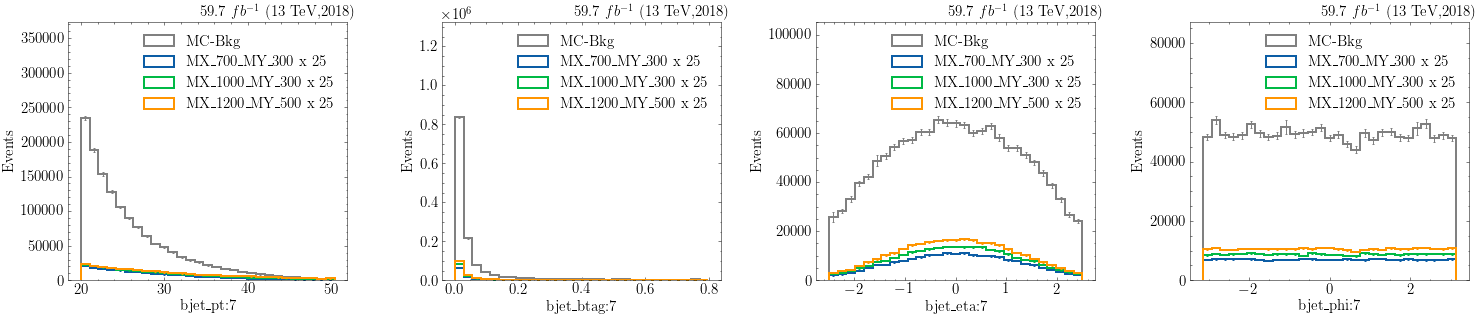

In [14]:
for i in range(8):
    fig,axs = study.quick(
        bkgtrees+signaltrees,
        varlist=[f'{var}:{i}'  for var in ('bjet_pt','bjet_btag','bjet_eta','bjet_phi')],
        legend=True,
        h_label_stat=None,
        scale=[None]+[25]*3,
        dim=(-1,4,),
    )
    study.save_fig(fig,dout,f'bjet-{i}')
    plt.show()
    

In [15]:
varinfo.higgs_m = dict(bins=np.linspace(0,300,50))

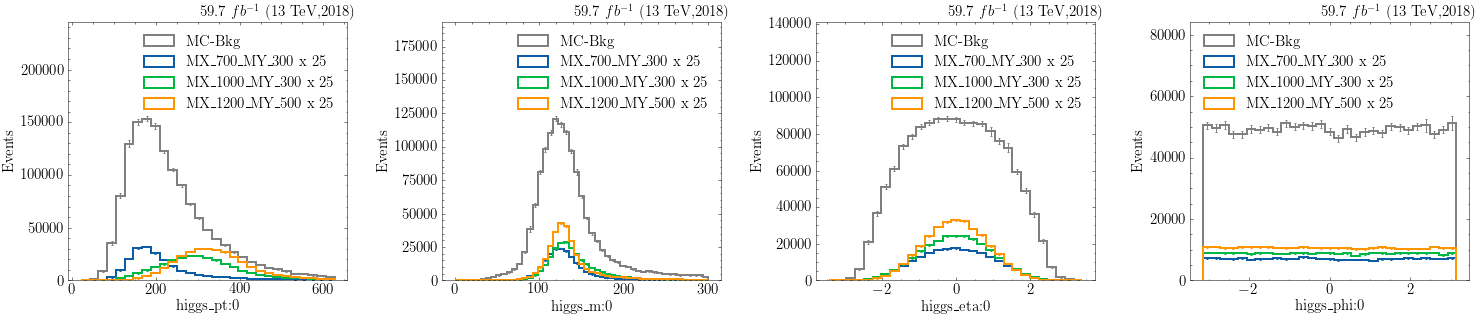

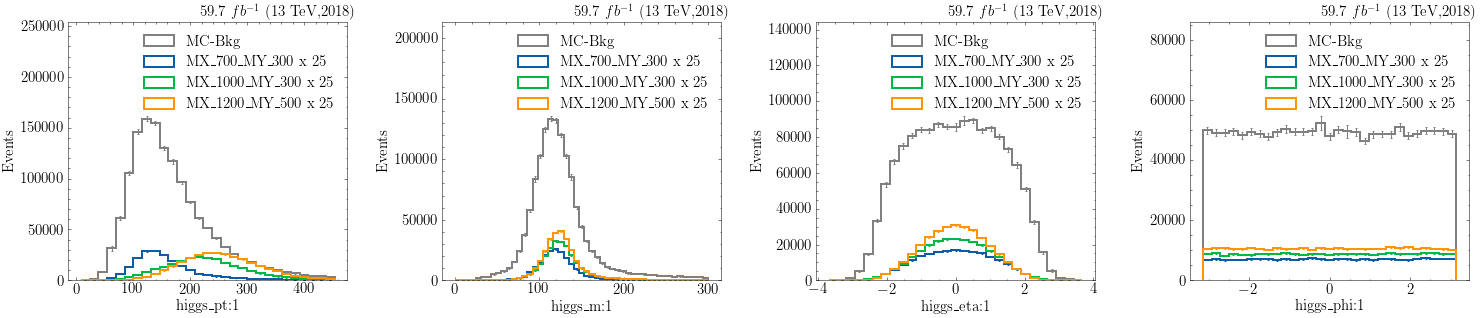

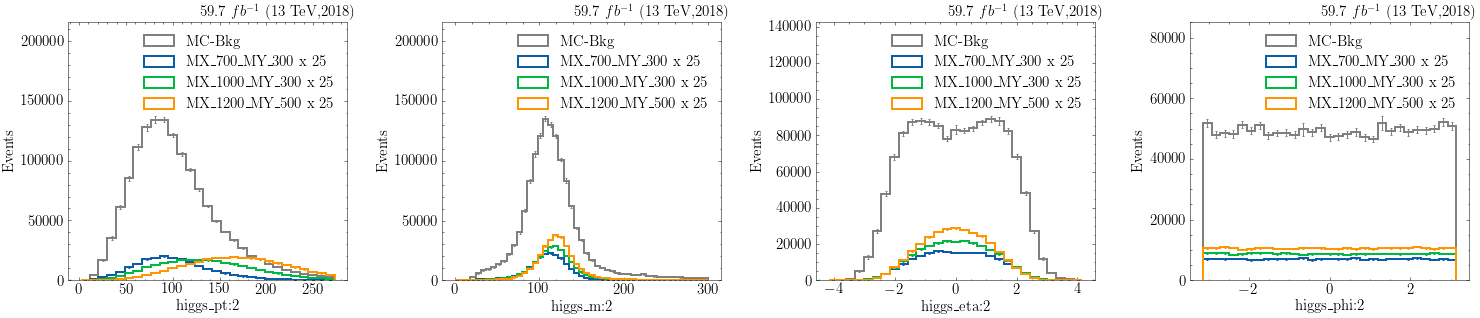

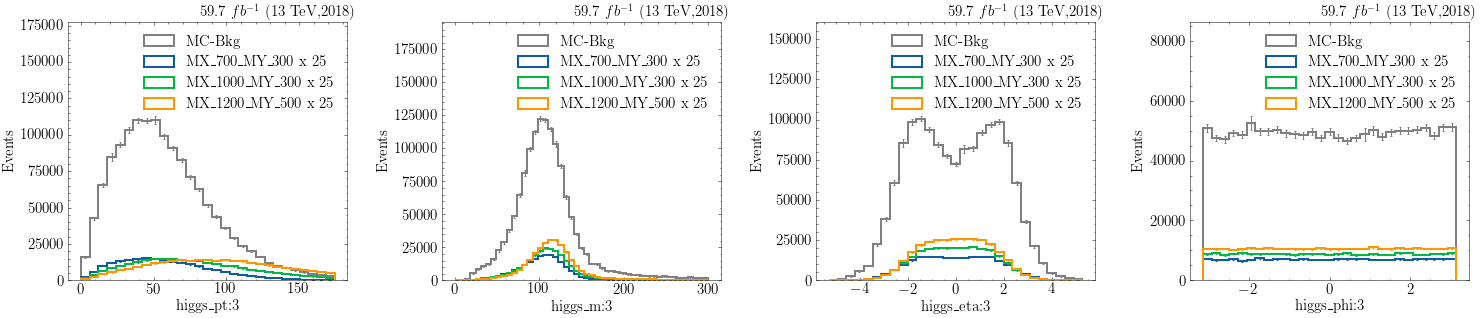

In [16]:
for i in range(4):
    fig,axs = study.quick(
        bkgtrees+signaltrees,
        varlist=[f'{var}:{i}'  for var in ('higgs_pt','higgs_m','higgs_eta','higgs_phi')],
        legend=True,
        h_label_stat=None,
        scale=[None]+[25]*3,
        dim=(-1,4,),
    )
    study.save_fig(fig,dout,f'higgs-{i}')
    plt.show()
    

In [17]:
varinfo.y_m = dict(bins=np.linspace(0,1000,30))

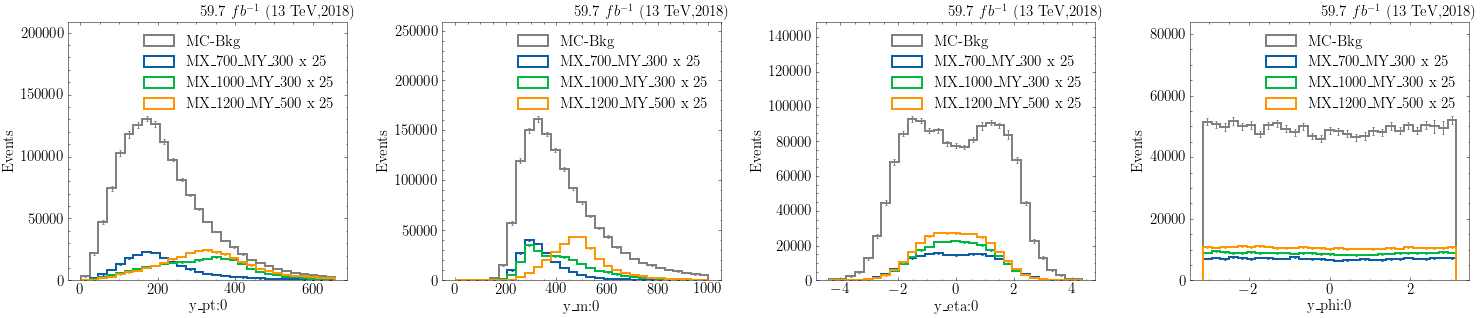

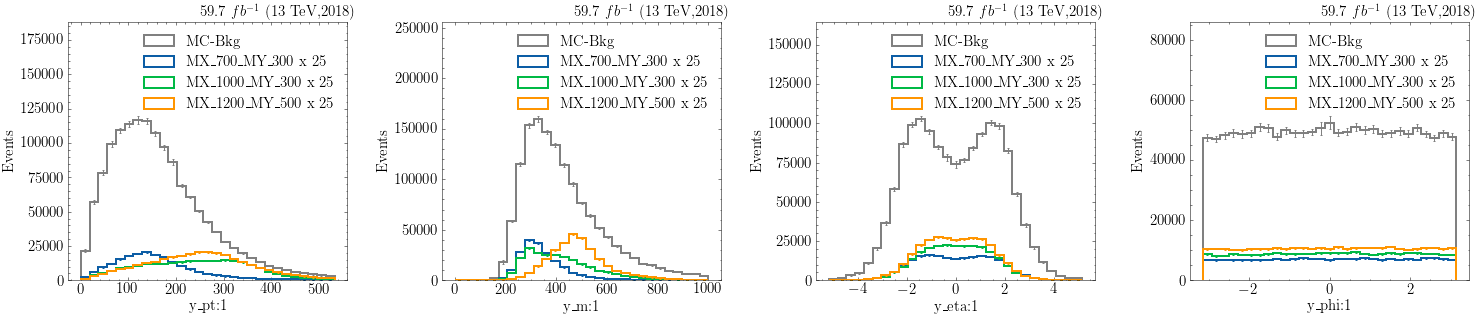

In [18]:
for i in range(2):
    fig,axs = study.quick(
        bkgtrees+signaltrees,
        varlist=[f'{var}:{i}'  for var in ('y_pt','y_m','y_eta','y_phi')],
        legend=True,
        h_label_stat=None,
        binlist=[None,np.linspace(0,1000,30)],
        scale=[None]+[25]*3,
        dim=(-1,4,),
    )
    study.save_fig(fig,dout,f'y-{i}')
    plt.show()
    

In [19]:
varinfo.X_m = dict(bins=np.linspace(0,3000,30))

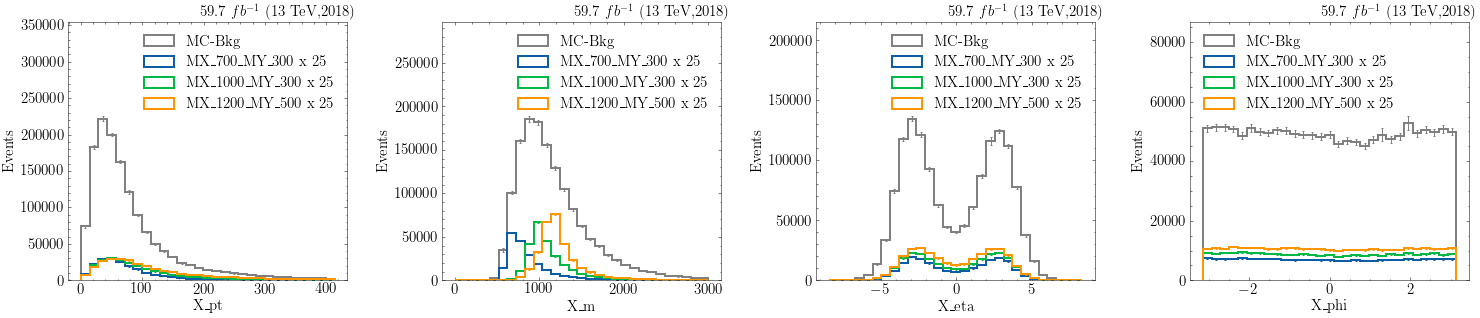

In [20]:
fig,axs = study.quick(
    bkgtrees+signaltrees,
    varlist=['X_pt','X_m','X_eta','X_phi'],
    legend=True,
    h_label_stat=None,
    # binlist=[None,np.linspace(0,1000,30)],
    scale=[None]+[25]*3,
    # density=True,
    dim=(-1,4,),
)
study.save_fig(fig,dout,f'X')


In [24]:
bkgtrees.bjet_score

[<Array [[0.966, 0.67, 0.611, ... 0.484, 0.263]] type='3180552 * var * float32'>]

In [25]:
def calc_global(t):
    btagsum = ak.sum(t.bjet_btag,axis=-1)/8.0
    gnnsum = ak.sum(t.bjet_score,axis=-1)/8.0
    
    score_ratio = gnnsum/btagsum
    
    btagmult = {f'n_{wplabel}_btag':ak.sum(t.bjet_btag>wp,axis=-1) for wplabel,wp in zip(wplabels, jet_btagWP)}
    
    hm = t.higgs_m.to_numpy()
    hm = -np.sort(hm,axis=-1)
    
    t.extend(
        btagsum=btagsum,
        gnnsum=gnnsum,
        score_ratio=score_ratio,
        **btagmult,
        )
(bkgtrees+signaltrees).apply(calc_global)

[None, None, None, None]

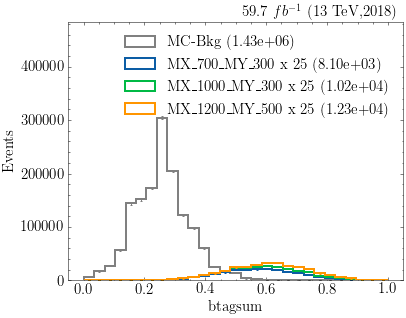

In [26]:
fig,axs = study.quick(
    bkgtrees+signaltrees,
    varlist=["btagsum"],
    binlist=[np.linspace(0,1,30)],
    legend=True,
    scale=[None]+[25]*3,
    dim=-1,
)
study.save_fig(fig,dout,'btagsum')


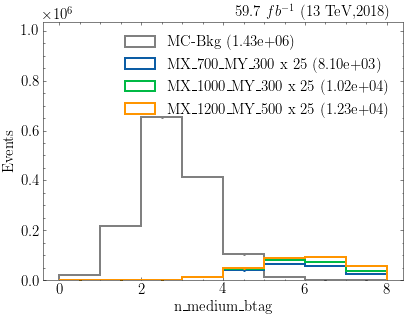

In [27]:
fig,axs = study.quick(
    bkgtrees+signaltrees,
    varlist=["n_medium_btag"],
    # binlist=[np.linspace(0,,30)],
    legend=True,
    scale=[None]+[25]*3,
    dim=-1,
)
study.save_fig(fig,dout,'medium_btagmult')


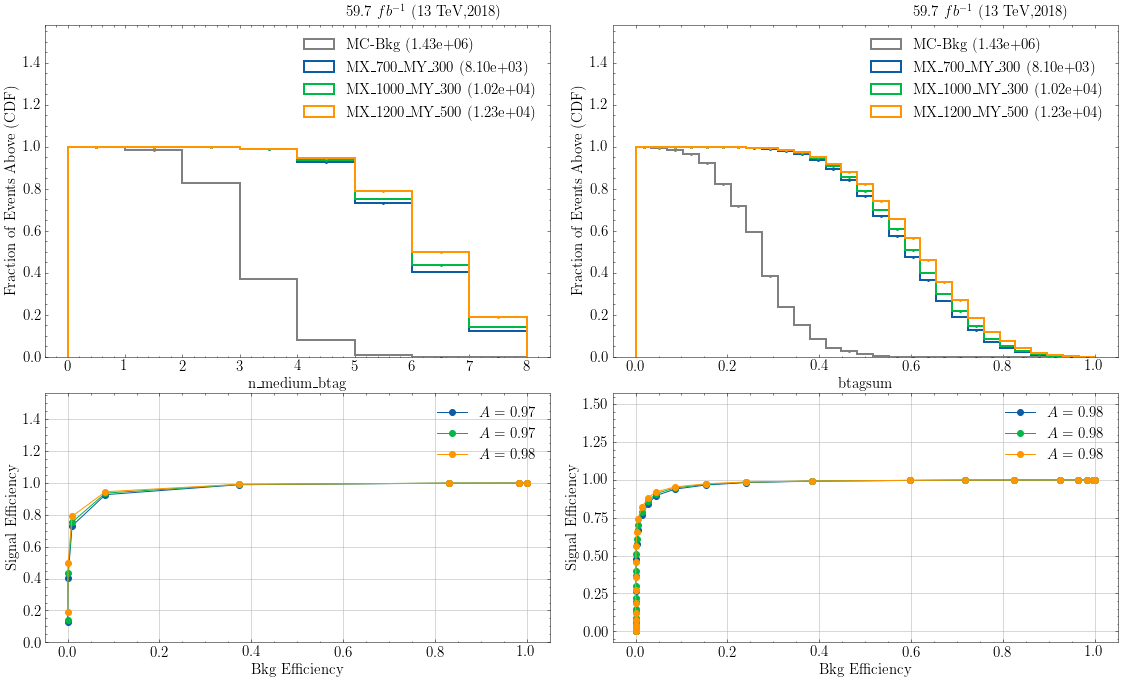

In [28]:
fig,axs = study.quick(
    bkgtrees+signaltrees,
    varlist=["n_medium_btag","btagsum"],
    binlist=[None,np.linspace(0,1,30)],
    legend=True,
    size=(8,10),
    cumulative=-1,
    
    correlation=True,
    c_legend=True,
    c_size="75%",
    c_xlabel="Bkg Efficiency",
    c_ylabel="Signal Efficiency",    
)

study.save_fig(fig,dout,'btag-cuts')


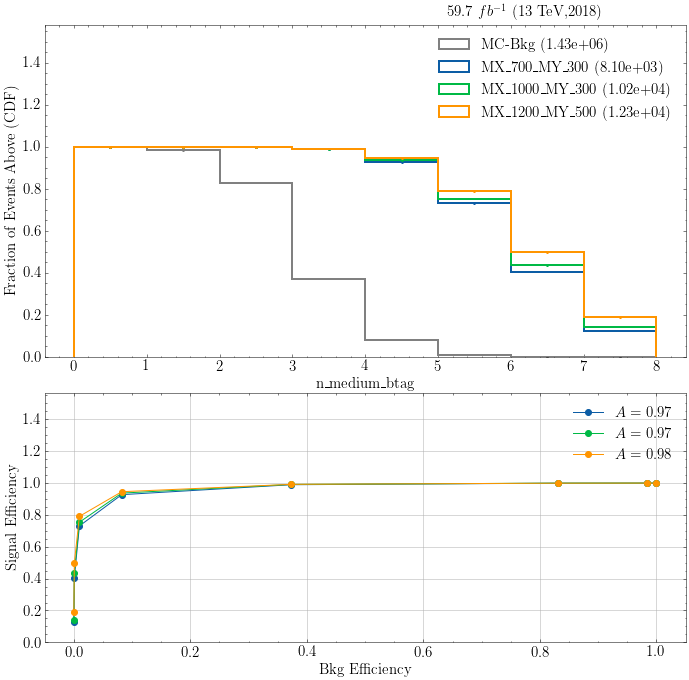

In [29]:
fig,axs = study.quick(
    bkgtrees+signaltrees,
    varlist=["n_medium_btag"],
    # binlist=[np.linspace(0,,30)],
    legend=True,
    size=(10,10),
    cumulative=-1,
    
    correlation=True,
    c_legend=True,
    c_size="75%",
    c_xlabel="Bkg Efficiency",
    c_ylabel="Signal Efficiency",    
)
study.save_fig(fig,dout,'medium_btagmult-cuts')


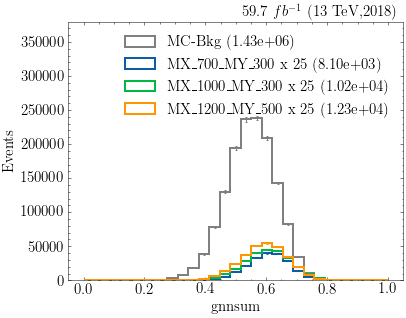

In [30]:
fig,axs = study.quick(
    bkgtrees+signaltrees,
    varlist=["gnnsum"],
    binlist=[np.linspace(0,1,30)],
    legend=True,
    scale=[None]+[25]*3,
    dim=-1,
)
study.save_fig(fig,dout,'gnnsum')


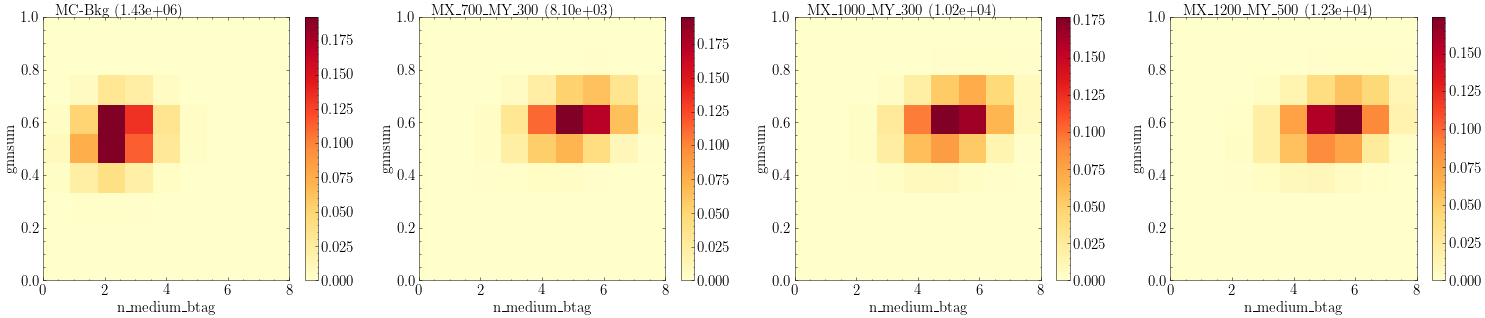

In [42]:
fig,axs = study.quick2d(
    (bkgtrees+signaltrees),
    # masks=lambda t : t.btagsum < 0.4,
    transforms=np.abs,
    varlist=['n_medium_btag','gnnsum'],
    binlist=[np.linspace(0,8,10),np.linspace(0,1,10)],
    # cmin=1,
    dim=-1,
    density=True,
    # cumulative=-1,
)

study.save_fig(fig, dout, 'btag-gnn-sum2d')

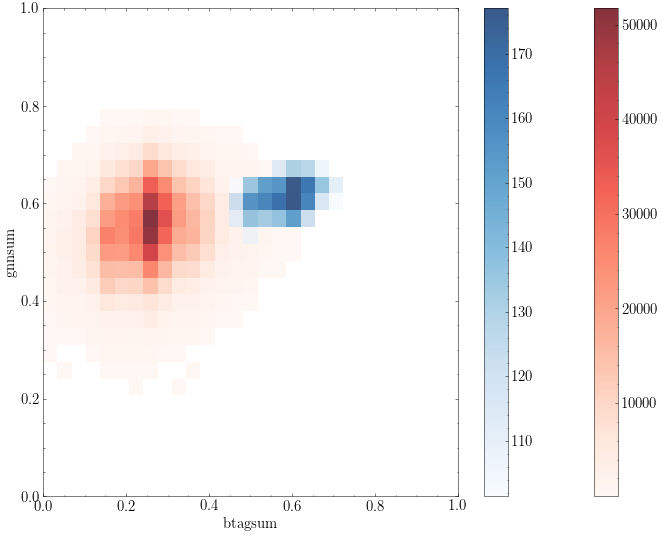

In [32]:
fig,axs = study.overlay2d(
    (bkgtrees+signaltrees[[0]]),
    # masks=lambda t : t.btagsum < 0.4,
    varlist=['btagsum','gnnsum'],
    binlist=[np.linspace(0,1,30),np.linspace(0,1,30)],
    size=(10,8),
    cmin=100
    
    # density=True,
)

study.save_fig(fig, dout, 'btag-gnn-sum2d-overlay')

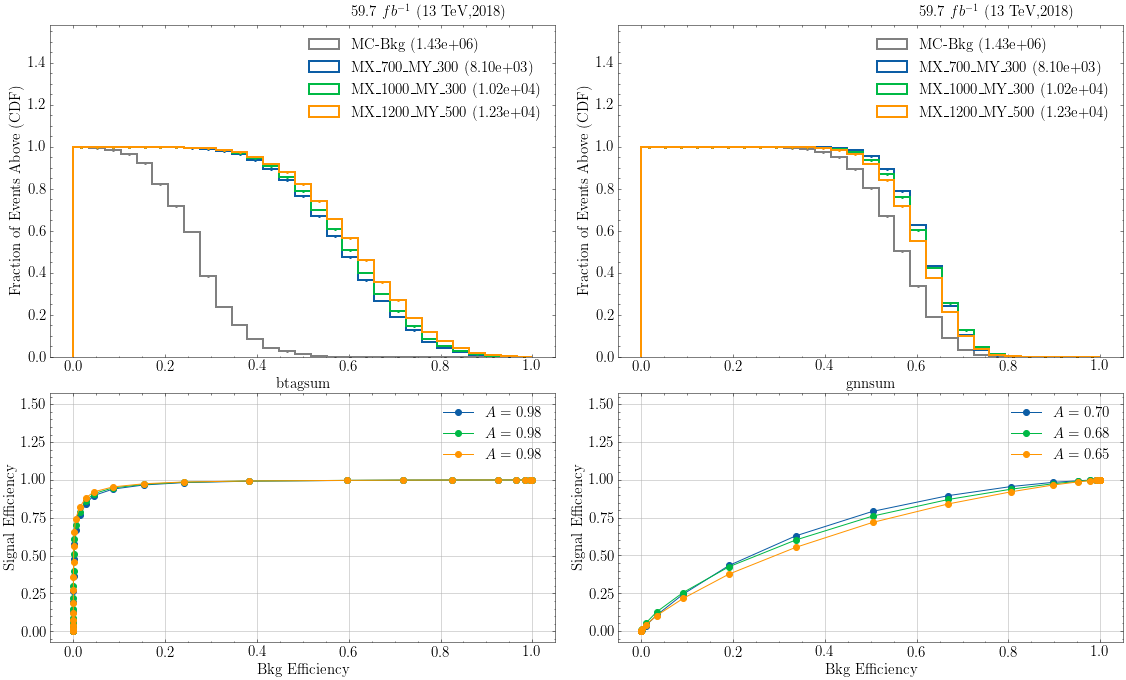

In [33]:
fig,axs = study.quick(
    bkgtrees+signaltrees,
    varlist=["btagsum","gnnsum"],
    binlist=[np.linspace(0,1,30)]*2,
    legend=True,
    scale=[None]+[25]*3,
    dim=-1,
    
    size=(8,10),
    cumulative=-1,
    
    correlation=True,
    c_legend=True,
    c_size="75%",
    c_xlabel="Bkg Efficiency",
    c_ylabel="Signal Efficiency",    
)
study.save_fig(fig,dout,'btag-gnn-sum-cut')


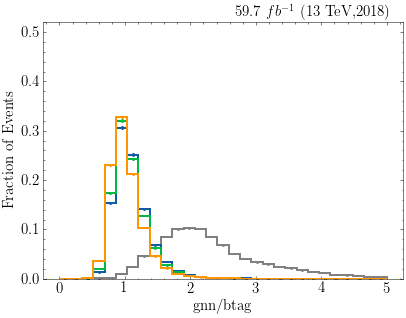

In [34]:
fig,axs = study.quick(
    (bkgtrees+signaltrees),
    varlist=['score_ratio'],
    xlabels=['gnn/btag'],
    binlist=[np.linspace(0,5,30)],
    density=True,
)

study.save_fig(fig,dout,'gnn_over_btag')


In [246]:
btagsum_tr = lambda t : t.btagsum > 0.66
btagsum_er = lambda t : ~btagsum_tr(t)

gnnsum_sr = lambda t : t.gnnsum > 0.33
gnnsum_cr = lambda t : (0.0 < t.gnnsum) & (t.gnnsum < 0.33)
gnnsum_vr = lambda t : t.gnnsum < 0.0

In [247]:
varinfo.btagsum = dict(bins=np.linspace(0,1,41))
varinfo.gnnsum = dict(bins=np.linspace(0,1,41))


In [255]:
ak.corr(signaltrees[0].btagsum, signaltrees[0].gnnsum, weight=signaltrees[0].scale)

0.6706272687319292

In [265]:
from sklearn.datasets import make_blobs 

array,labels = make_blobs(10000,n_features=2, centers=(1))

In [268]:
ak.corr(array[:,0],array[:,1])

-0.007922024123700553

In [254]:
ak.corr(bkgtree.btagsum, bkgtree.gnnsum, weight=bkgtree.scale)

0.5464096093855946

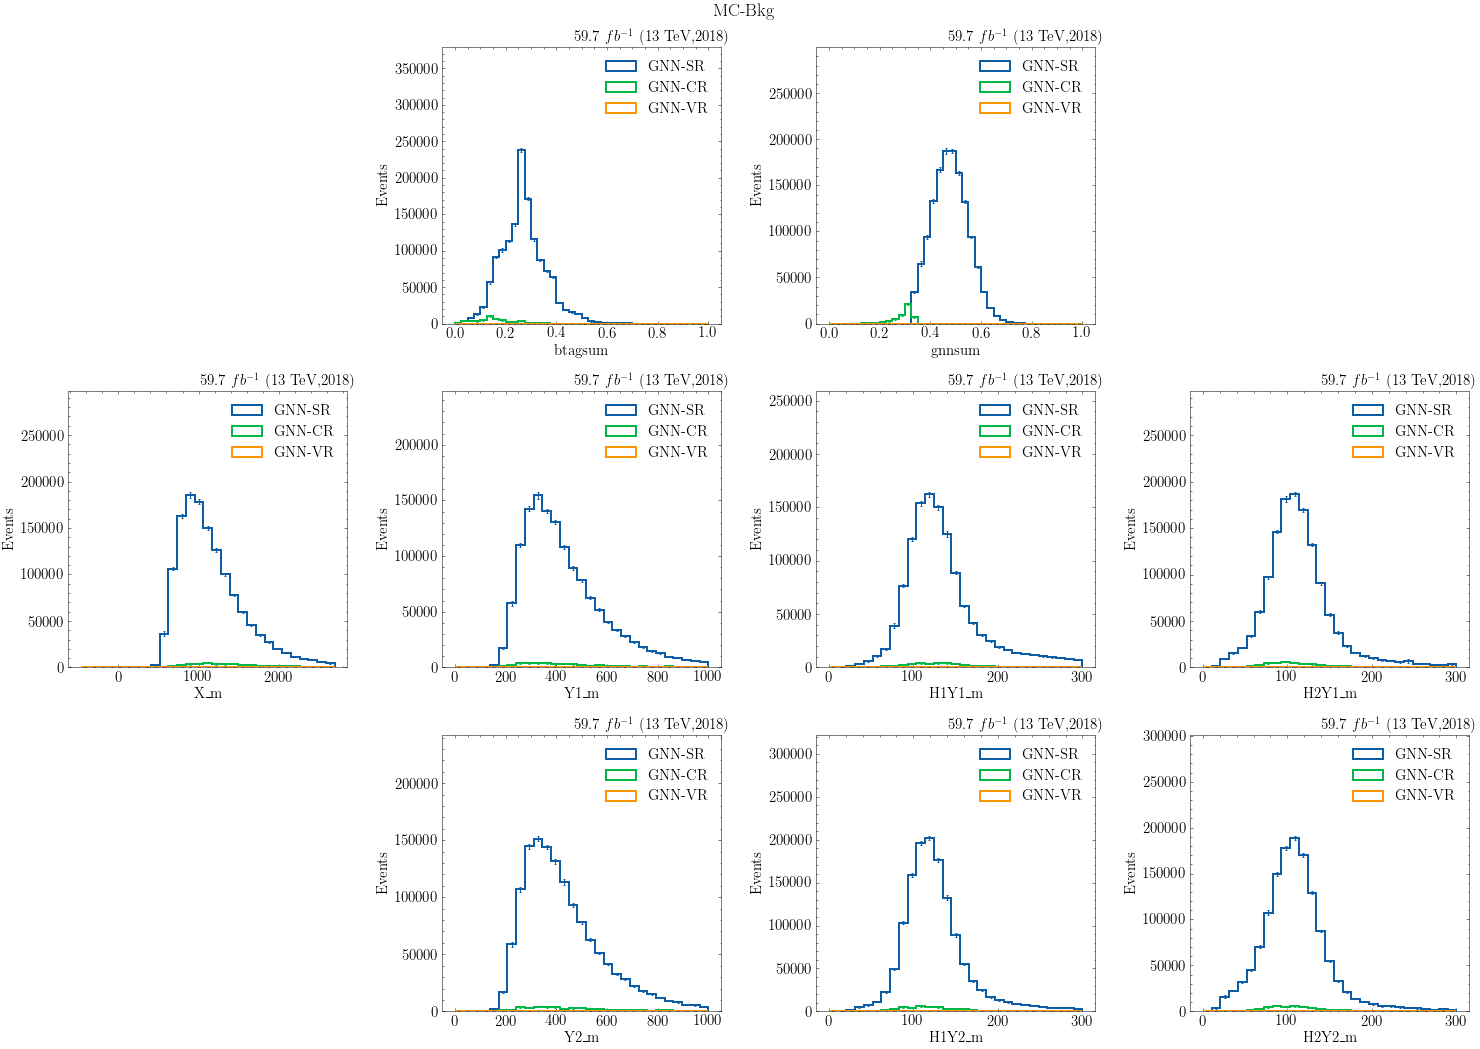

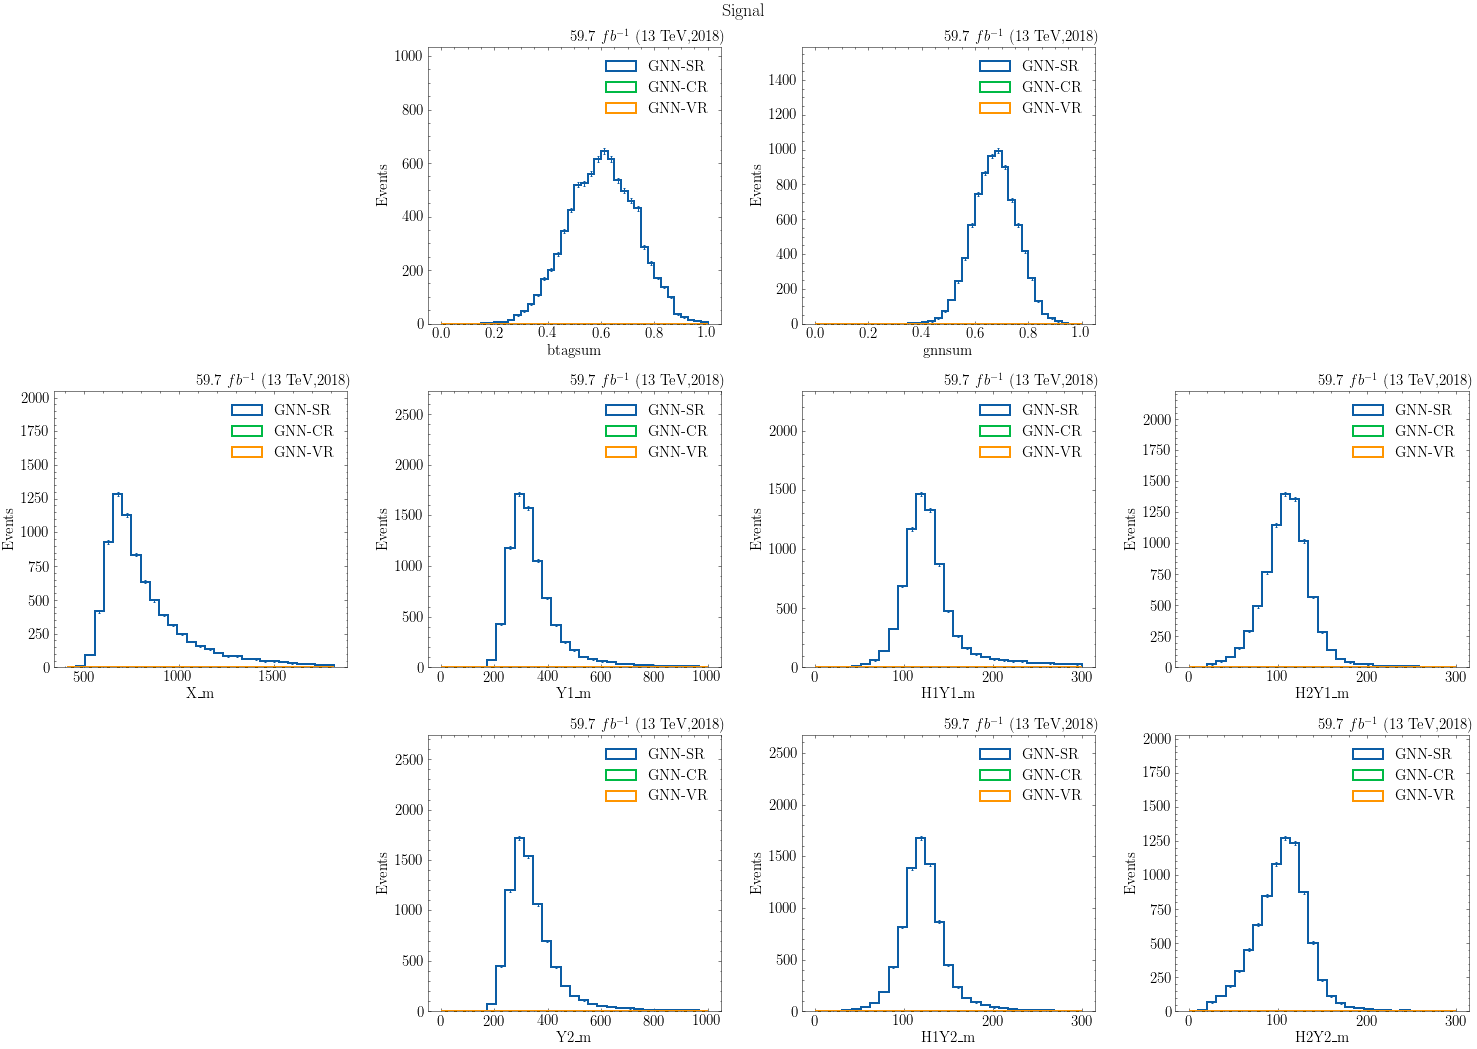

In [248]:
fig,axs = study.quick(
    bkgtrees[[0,0,0]],
    masks=[gnnsum_sr, gnnsum_cr, gnnsum_vr],
    varlist=[None,'btagsum','gnnsum',None]+['X_m','Y1_m','H1Y1_m','H2Y1_m',None,'Y2_m','H1Y2_m','H2Y2_m'],
    legend=True,
    h_label_stat=None,
    h_color=None,
    label=['GNN-SR','GNN-CR','GNN-VR'],
    title='MC-Bkg',
    # scale=[None]+[25]*3,
    
    # density=True,
    dim=(-1,4,),
)

fig,axs = study.quick(
    signaltrees[[0,0,0]],
    masks=[gnnsum_sr, gnnsum_cr, gnnsum_vr],
    varlist=[None,'btagsum','gnnsum',None]+['X_m','Y1_m','H1Y1_m','H2Y1_m',None,'Y2_m','H1Y2_m','H2Y2_m'],
    legend=True,
    h_label_stat=None,
    h_color=None,
    label=['GNN-SR','GNN-CR','GNN-VR'],
    title='Signal',
    # scale=[None]+[25]*3,
    
    # density=True,
    dim=(-1,4,),
)

# study.save_fig(fig,dout,'target_region_resonances')

# study.save_fig(fig,dout,'target_region_resonances')

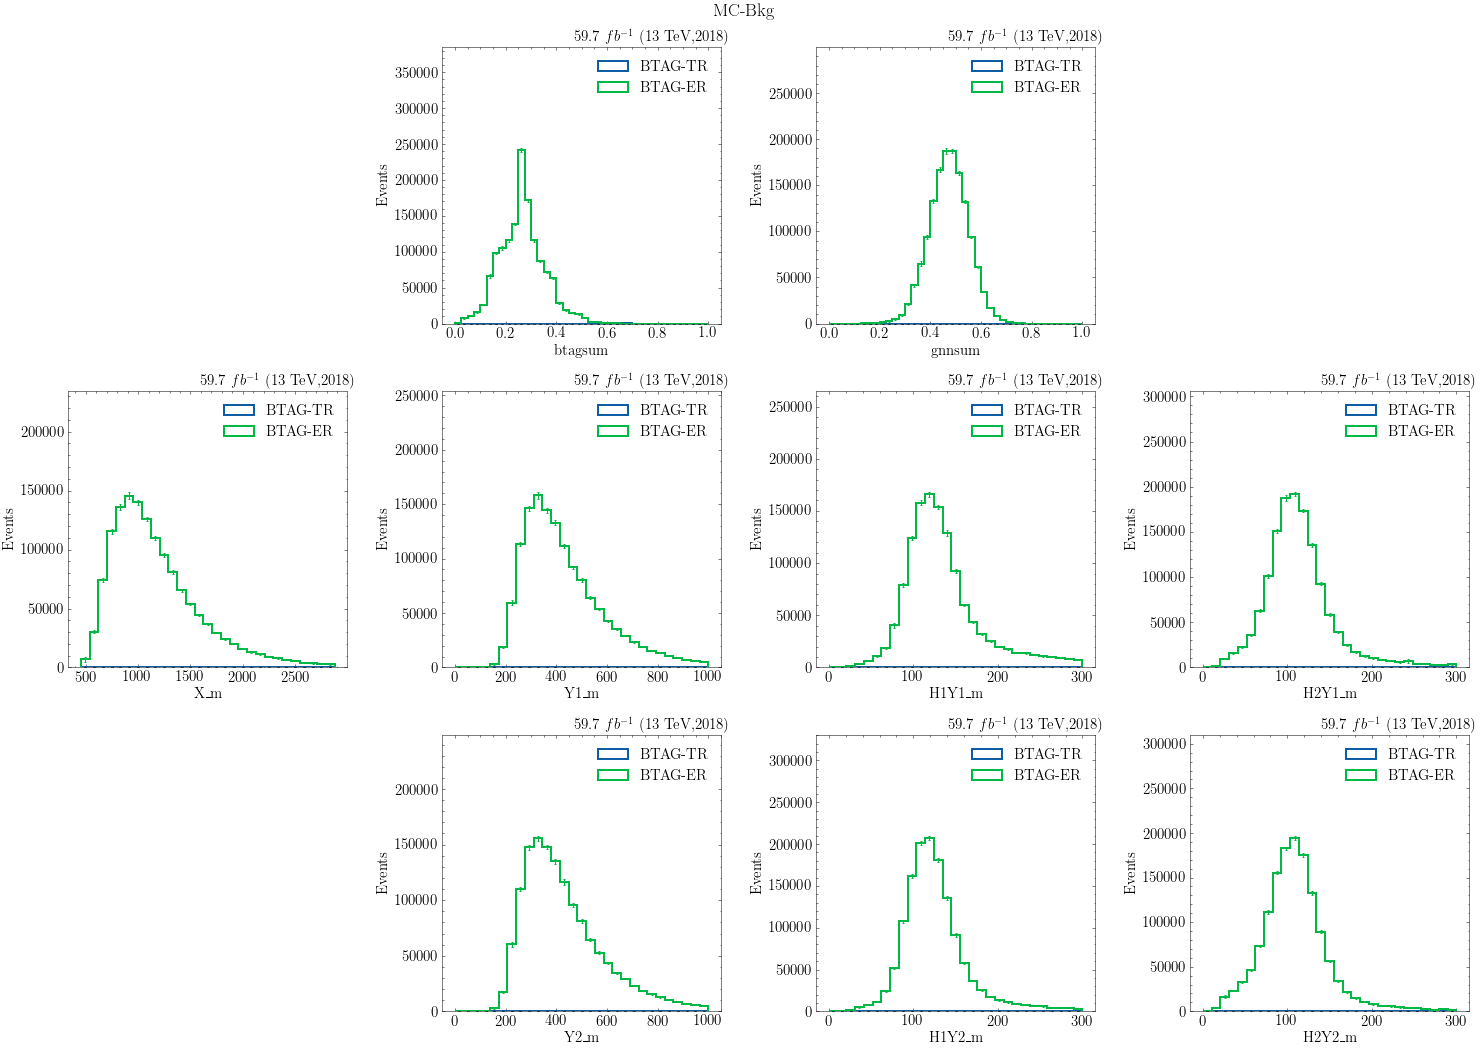

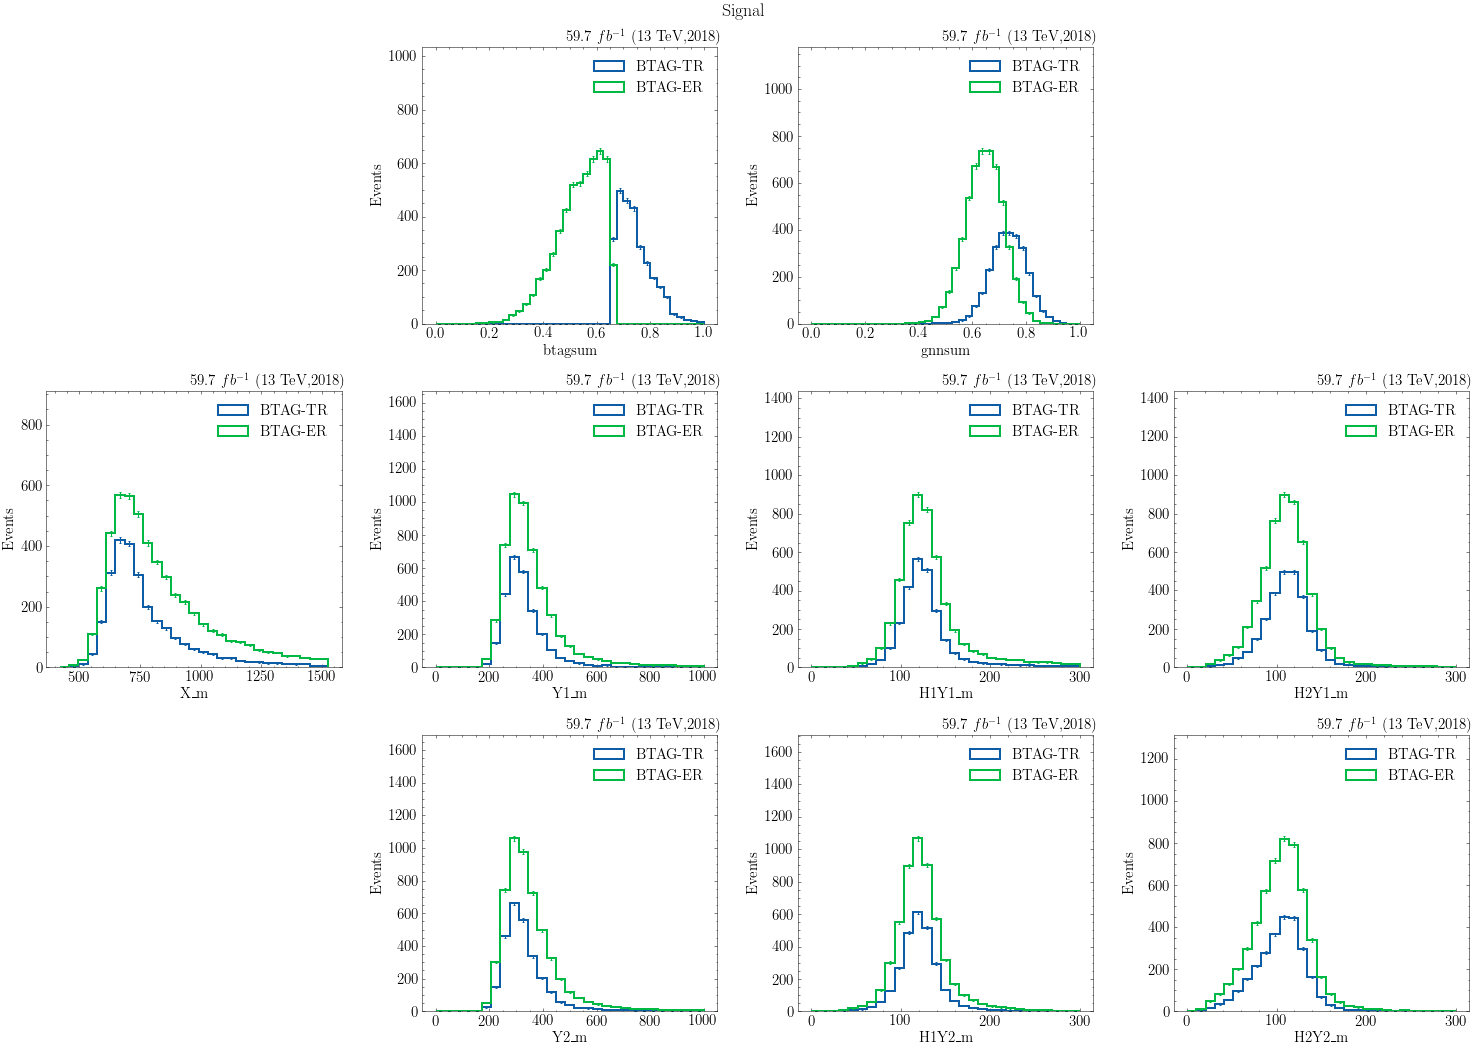

In [249]:
fig,axs = study.quick(
    bkgtrees[[0,0]],
    masks=[btagsum_tr,btagsum_er],
    varlist=[None,'btagsum','gnnsum',None]+['X_m','Y1_m','H1Y1_m','H2Y1_m',None,'Y2_m','H1Y2_m','H2Y2_m'],
    legend=True,
    h_label_stat=None,
    h_color=None,
    label=['BTAG-TR','BTAG-ER'],
    title='MC-Bkg',
    # scale=[None]+[25]*3,
    
    # density=True,
    dim=(-1,4,),
)

fig,axs = study.quick(
    signaltrees[[0,0]],
    masks=[btagsum_tr,btagsum_er],
    varlist=[None,'btagsum','gnnsum',None]+['X_m','Y1_m','H1Y1_m','H2Y1_m',None,'Y2_m','H1Y2_m','H2Y2_m'],
    legend=True,
    h_label_stat=None,
    h_color=None,
    label=['BTAG-TR','BTAG-ER'],
    title='Signal',
    # scale=[None]+[25]*3,
    
    # density=True,
    dim=(-1,4,),
)

# study.save_fig(fig,dout,'target_region_resonances')

# study.save_fig(fig,dout,'target_region_resonances')

In [169]:
def get_scaled_events(tree, mask):
    mask = mask(tree)
    lumi = lumiMap[2018][0]
    return lumi*np.sum(tree.scale[mask])

In [170]:
astr = lambda t : gnnsum_sr(t) & btagsum_tr(t)
aser = lambda t : gnnsum_sr(t) & btagsum_er(t)

actr = lambda t : gnnsum_cr(t) & btagsum_tr(t)
acer = lambda t : gnnsum_cr(t) & btagsum_er(t)

vtr = lambda t : gnnsum_vr(t) & btagsum_tr(t)
ver = lambda t : gnnsum_vr(t) & btagsum_er(t)

In [171]:
totals = (bkgtrees+signaltrees).expected_events().npy

In [172]:
astr_events = (bkgtrees+signaltrees).apply(lambda t : get_scaled_events(t, astr)).npy[None]
aser_events = (bkgtrees+signaltrees).apply(lambda t : get_scaled_events(t, aser)).npy[None]
actr_events = (bkgtrees+signaltrees).apply(lambda t : get_scaled_events(t, actr)).npy[None]
acer_events = (bkgtrees+signaltrees).apply(lambda t : get_scaled_events(t, acer)).npy[None]
vtr_events = (bkgtrees+signaltrees).apply(lambda t : get_scaled_events(t, vtr)).npy[None]
ver_events = (bkgtrees+signaltrees).apply(lambda t : get_scaled_events(t, ver)).npy[None]



In [173]:
events = np.concatenate([astr_events,aser_events,actr_events,acer_events,vtr_events,ver_events])

In [174]:
def plot_grid(*yields,figax=None, vmax=None,**kwargs):
    if figax is None: figax = plt.subplots()
    fig,ax = figax
    array = np.array([ get_avg_std(nevents) for nevents in yields])
    
    means = array[:,0].reshape(3,2)
    std   = array[:,1].reshape(3,2)
    vmin = 0
    if vmax is None: vmax = np.max(means)
    
    im = ax.imshow(means,vmin=vmin,vmax=vmax,cmap='YlOrRd')
    ax.set(yticks=[0,1,2],yticklabels=['SR','CR','VR'],xticks=[0,1],xticklabels=['TR','ER'],**kwargs)
    for i in range(3):
        for j in range(2):
            txt = f'{means[i,j]:0.3f}'
            if (std[i,j] > 0): txt += f'$\pm${std[i,j]:0.3f}'
            ax.text(j,i,f'{txt}',ha="center", va="center", fontweight="bold")
    

In [235]:
bkgtree = bkgtrees[0]
def abcd_region(cuts, tree=bkgtree, debug=False):
    btagcut, gnncut = cuts 
    btagsum, gnnsum = tree.btagsum, tree.gnnsum 
        
    btagsum_tr = btagsum > btagcut 
    gnnsum_sr = gnnsum > gnncut 
    scale = tree.scale
    a = ak.sum(scale[gnnsum_sr & btagsum_tr])
    b = ak.sum(scale[gnnsum_sr & ~btagsum_tr])
    
    c = ak.sum(scale[~gnnsum_sr & btagsum_tr])
    d = ak.sum(scale[~gnnsum_sr & ~btagsum_tr])
        
    if debug: print(a,b,c,d)
    if debug: print(a/b,c/d)
    z = np.abs(a/b - c/d)/(a/b+c/d)
    return z
    

In [244]:
from scipy.optimize import minimize, fmin

minim = fmin(abcd_region, (0.6,0.4),)

Optimization terminated successfully.
         Current function value: 0.969291
         Iterations: 37
         Function evaluations: 72


In [245]:
print(minim)

abcd_region(minim, debug=True)

[0.66164172 0.33616013]
0.004239129854548973 23.006111639655604 2.6415915425166916e-06 0.9193327264123123
0.00018426103119668384 2.873379209315738e-06


0.9692907445179989